![tutorial banner](https://github.com/PV-Tutorials/2025_pvlib_pvsc/blob/main/static/pvlib_pvsc_logo.png?raw=true)

# PV Systems Modeling with Python: an Interactive Introduction

Welcome to the 2025 PVSC tutorial on **PV Systems modeling with Python**. This tutorial will give an introduction to how to model photovoltaic (PV) system energy yield using the open-source software [pvlib-python](https://pvlib-python.readthedocs.io/).

We will be modeling the energy yield of a single-axis tracking (SAT) with bifacial modules. The specific plant is a 465 MW plant in Alberta, Canada called the [Travers Solar Project](https://en.wikipedia.org/wiki/Travers_Solar_Project).

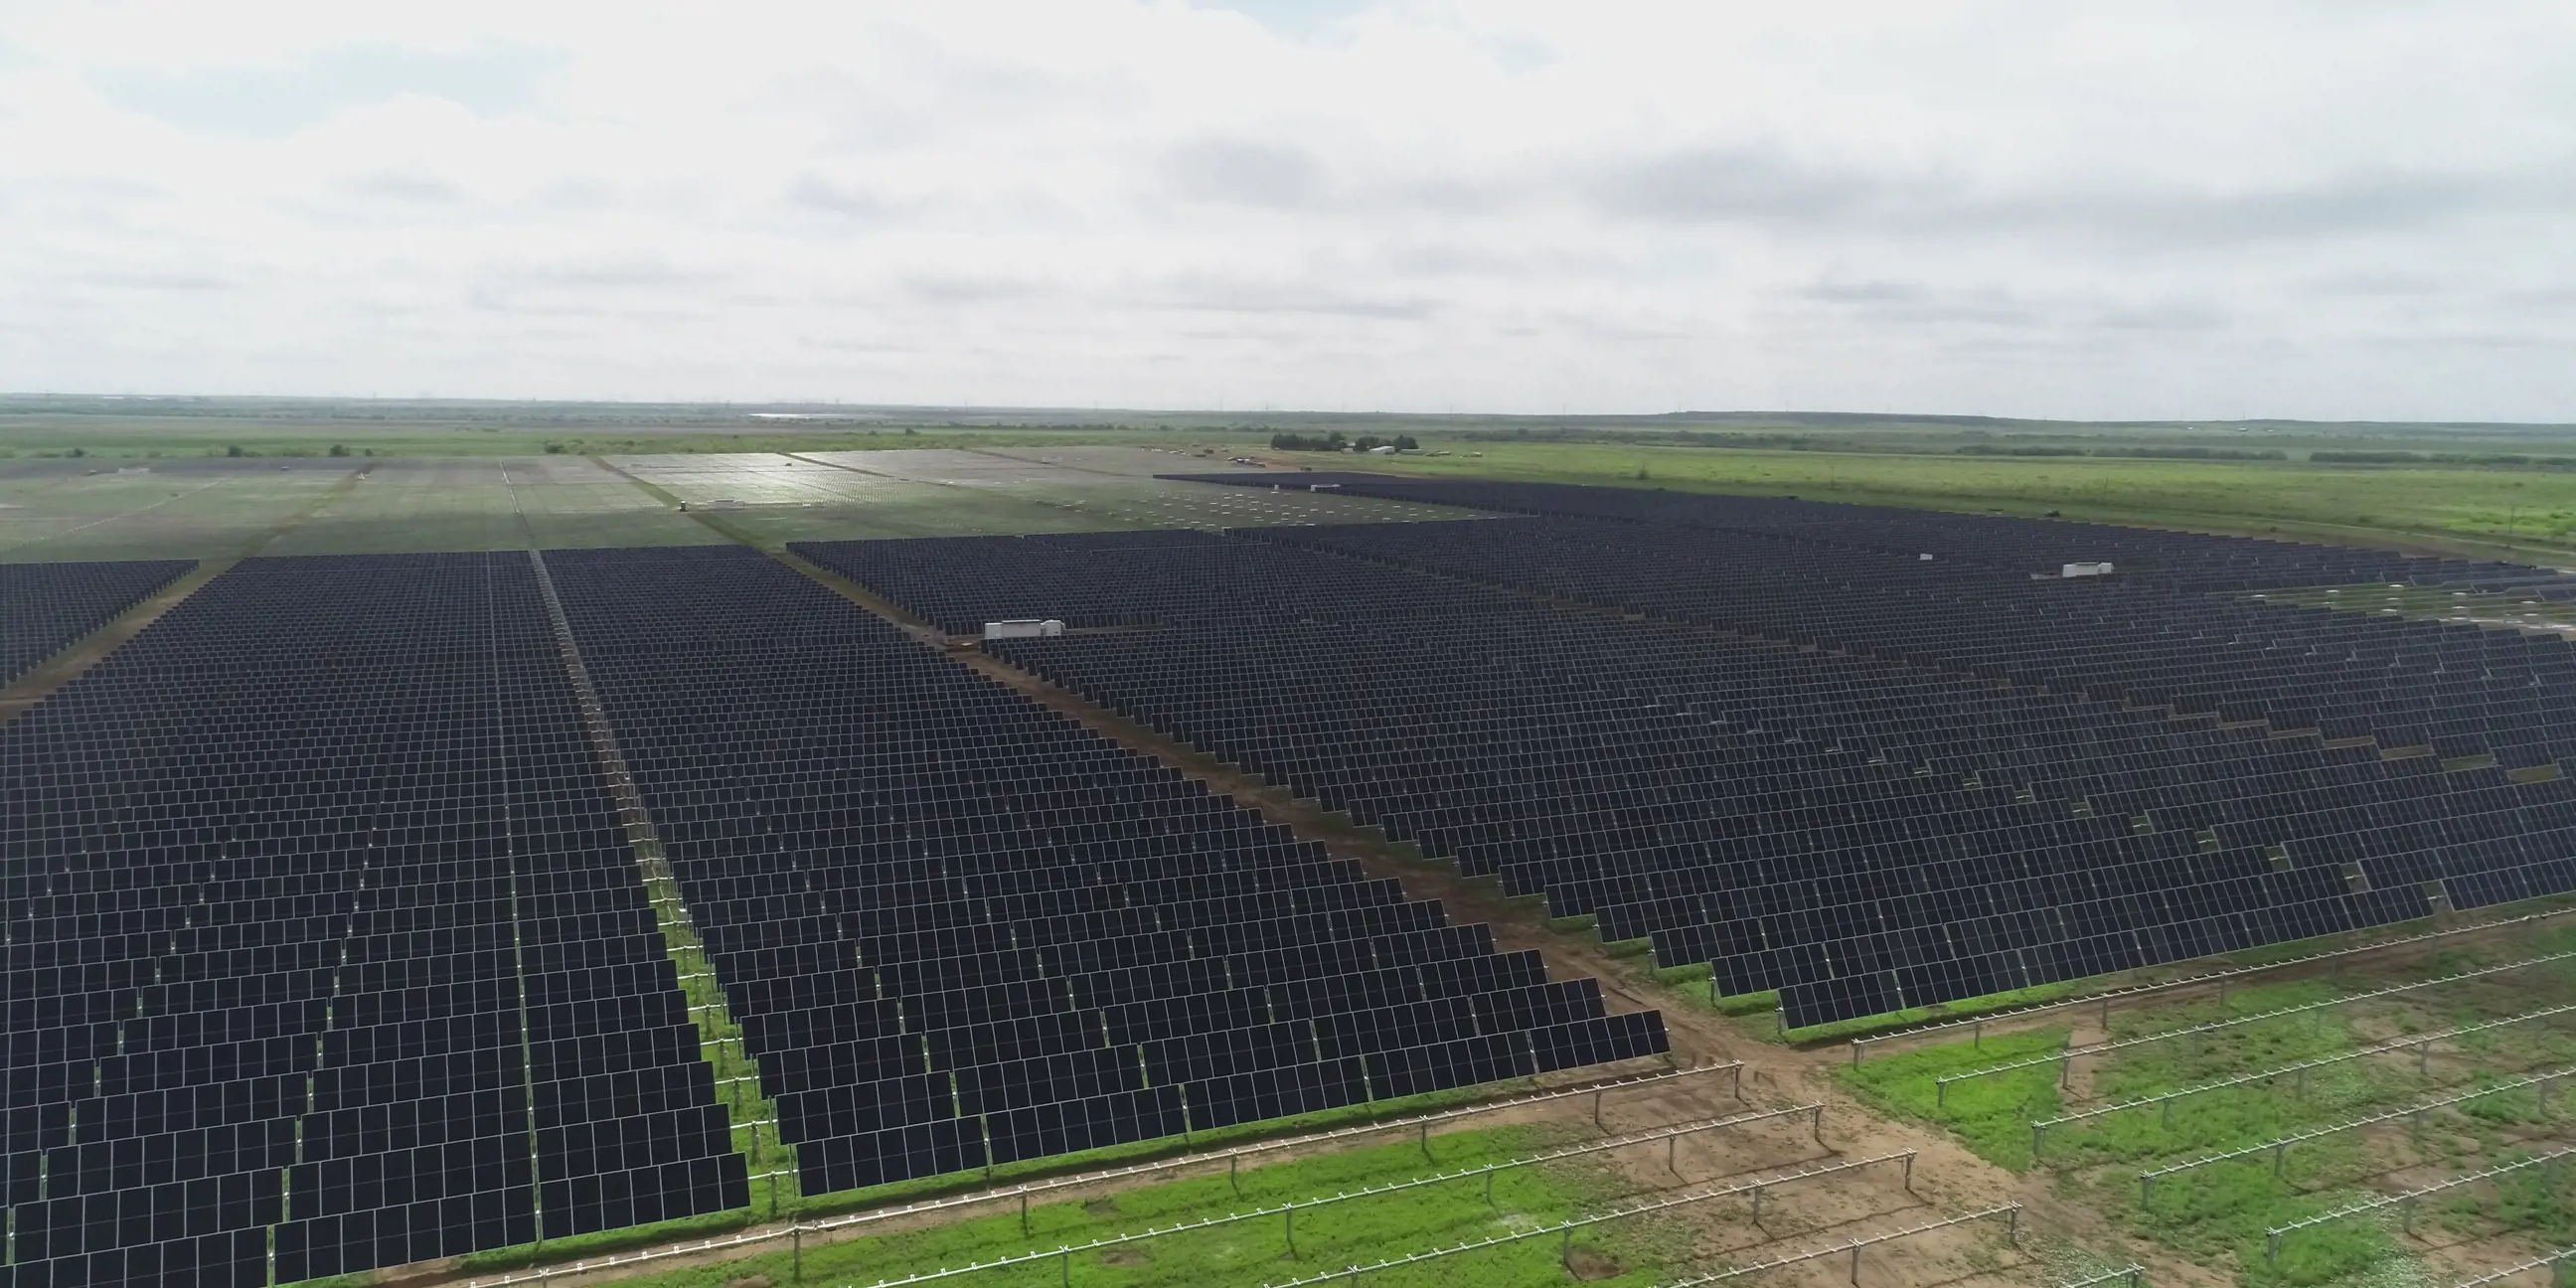
_Credit: Copenhagen Infrastructure Partners [3]._

The following parameters have been estimated based on freely available data online or estimated:

**General information**
- Coordinates [1]: 50.267, -112.718
- Project life [2]: 35+ years

**Plant layout and configuration**
* Mounting: single-axis trackers
* Tracking axis: north-south (0 degrees)
* Module configuration: one-in-portrait (1P)
* Max rotation: 55 degrees (_estimate_)
* Pitch [2]: 6.67m
* Torque tube height: 1.8 m (_estimate_)

**Modules**
* Total capacity [3]: 691 MWdc
* No. of modules [3]: approx. 1,300,000
* Module nameplate capacity: ~530W
* Technology [4]: bifacial monocrystalline
* Manufacturer [4]: Jinko
* Module model : [datasheet (_example_)](https://www.starworld-tech.com/half-cell-solar-panel/jinko-tiger-pro-bifacial-530-550w-.html)
* Bifaciality: 70% (_estimate_)

**Inverters**
* Total output [3]: 465 MWac
* Number of inverters [2]: 153
* Inverter type: central

## References
- [1] https://en.wikipedia.org/wiki/Travers_Solar_Project
- [2] https://www.traverssolar.ca/ (Oct. 2020 Project Map and Feb. 2019 Open House Boards)
- [3] https://www.cip.com/approach/our-projects/travers/
- [4] https://www.power-technology.com/projects/travers-solar-project-alberta-canada.

## Step 0: Getting familliar with Google Colab

The notebook can be seamlessly run in Google Colab, a free no-installation tool for running Python code from your web browser. 

Notebooks are organized by text and code "cells".  You can double-click a cell to start editing it.  To render a text cell, or execute a code cell, hit shift+enter.

In the code cell below, try out some math calculations to explore how the notebook and Python works:

In [7]:
# write some code and execute it here
a = 1
b = 2
print(a*b)

2


## Step 1: Install pvlib

First, we need to get pvlib installed in the Colab environment.  Active the following code cell (left click) and execute it (shift+enter) to automatically download and install pvlib:

In [ ]:
!pip install pvlib==0.12.0

## Step 2: Use pvlib

Here's a simple example of running pvlib code: using pvlib-python and pandas (a library for data analysis), calculate a clear-sky irradiance profile for the Travers Solar Project plant for today (June 8th, 2025).

In [13]:
# Import libraries
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Define location object
site_location = pvlib.location.Location(latitude=50.267, longitude=-112.718)

# Define time stamps
times = pd.date_range(
    start='2025-06-08 00:00',
    end='2025-06-08 23:59',
    freq='5min',
    tz='Canada/Mountain',
)

# Estimate clear-sky irradiance
clearsky_irradiance = site_location.get_clearsky(times)

<Axes: title={'center': 'Clear-Sky Simulation'}, ylabel='Irradiance [W/m2]'>

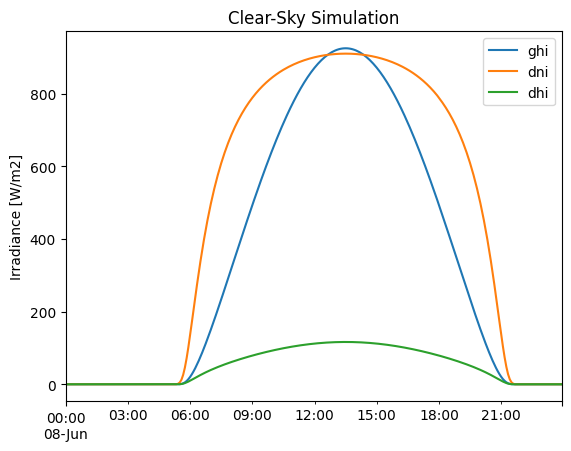

In [15]:
# Plot clear-sky irradiance
clearsky_irradiance.plot(ylabel='Irradiance [W/m2]', title='Clear-Sky Simulation')

If you want to look up how to use a function, you can either look up its page in the pvlib documentation (https://pvlib-python.readthedocs.io/en/stable/reference/index.html).

## Step 3: Irradiance data
Now, let's get serious and get some actual irradiance data. For this purpose, we will use pvlib's iotools module. You can read about the type of weather data supported [here](https://pvlib-python.readthedocs.io/en/stable/user_guide/weather_data.html).

In this tutorial, we will retrieve TMY irradiance data from PVGIS. The relevant pvlib function is [``pvlib.iotools.get_pvgis_tmy``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html).

**Can you figure out how to download weather data for the Travers Solar Project?**

*Hint:* To calculate the solar position correctly, you need to shift the index to be in the middle of the period. The data is labeled by the left edge (start of interval).

In [ ]:
# Write your code here to retrieve irradiance data
data, inputs, months, meta = 

data.index = data.index + pd.Timedelta(minutes=30)

data

## Step 4: Calculate solar position

When using irradiance data, we almost always need to know the corresponding solar position for each time step.

Can you figure out how use pvlib to calculate the solar position for the time steps of the data downloaded in the previous step?

*Hint: the time steps are the index of the ``data`` DataFrame. To access the index, you can use DataFrame.index.*

In [7]:
# Write your code here to calculate solar position
solar_position = 

solar_position.head()

apparent_zenith      zenith  apparent_elevation  \
time(UTC)                                                                    
2018-01-01 00:30:00+00:00       155.274315  155.274315          -65.274315   
2018-01-01 01:30:00+00:00       146.187240  146.187240          -56.187240   
2018-01-01 02:30:00+00:00       135.625328  135.625328          -45.625328   
2018-01-01 03:30:00+00:00       124.609825  124.609825          -34.609825   
2018-01-01 04:30:00+00:00       113.607076  113.607076          -23.607076   

                           elevation     azimuth  equation_of_time  
time(UTC)                                                           
2018-01-01 00:30:00+00:00 -65.274315   44.019724         -3.336272  
2018-01-01 01:30:00+00:00 -56.187240   65.585246         -3.355906  
2018-01-01 02:30:00+00:00 -45.625328   79.792687         -3.375531  
2018-01-01 03:30:00+00:00 -34.609825   90.713175         -3.395147  
2018-01-01 04:30:00+00:00 -23.607076  100.270466         -3.414753

## Step 5: Calculate tracker orientations

The next step is to determine the orientation (rotation) of the single-axis trackers as this influences the incident irradiance.

The orientation of a single-axis tracker can be calculated using the [``pvlib.tracking.singleaxis``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.tracking.singleaxis.html) function.

You may assume that the tracking axis has the typical orientation of north-south, which corresponds to ``axis_azimuth=0``. Also, we will assume that the SAT features backtracking and has a maximum tracker rotation angle of 55 degrees.

Last, you may notice that the ground coverage ratio (GCR) is also needed but hasn't been provided. This dimensionless ratio can be calculated by dividing the module length (given that it is a 1P configuration) by the pitch (row-to-row distance).

In [ ]:
max_tracker_angle = 55  # [degrees]
pitch = 6.67  # [m] center-to-center tracker spacing in the horizontal dimension
module_length = 2.274  # [m] from datasheet
gcr = 

# calculate tracker rotations for a single-axis tracker
tracker_orientations = 

# Print five first non-nan rows
tracker_orientations.dropna().head()

## Step 6: Calculate plane of array irradiance
The irradiance data we obtained from PVGIS contains the three standard components:
- global horizontal irradiance (GHI)
- diffuse horizontal irradiance (DHI)
- direct normal irradiance (DNI)

However, to determine PV generation, we need to know the incident irradiance on the module surface, which is denoted as plane of array (POA) irradiance. Additionally, since we are working with bifacial modules, we need to estimate both the front and rear-side POA irradiance.

To do this, we will be using pvlib's [infinite sheds bifacial model](https://pvlib-python.readthedocs.io/en/stable/user_guide/bifacial.html#infinite-sheds) which is based on view factors and assumes the PV system comprises of parallel, evenly spaced rows on a level, horizontal surface. The function is called [``pvlib.bifacial.infinite_sheds.get_irradiance``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.bifacial.infinite_sheds.get_irradiance.html).

**Can you use the infinite sheds model to calculate front and rear side irradiance?** Remember you have determined the tracker orientation in the previous step.

In [ ]:
# Write your code here to calculate plane of array irradiance

dni_extra = pvlib.irradiance.get_extra_radiation(data.index)

front_rear_irradiance = pvlib.bifacial.infinite_sheds.get_irradiance(
    # fill in all the necessary inputs
    #
    #
    #
)

# Print five first non-nan rows
front_rear_irradiance.dropna().head()

## Step 7: Calculate module temperature

The power efficiency of a PV module depends on its temperature (roughly, a 0.4% decrease for every increase in degree C).  Module temperature can be estimated based on ambient temperature and POA irradiance.

pvlib includes several models for estimating module temperature. Can you find one in the documentation?

In [10]:
# Write your code here to calculate module temperature using a model of your choosing
module_temperature = 


time(UTC)
2018-01-01 07:30:00+00:00    10.909240
2018-01-01 08:30:00+00:00    12.488489
2018-01-01 09:30:00+00:00    13.696782
2018-01-01 10:30:00+00:00    15.490398
2018-01-01 11:30:00+00:00    16.363502
dtype: float64

## Step 7: Calculate DC PV power

With the plane of array irradiance and module temperature ready, we can now estimate the PV output power.  There are several modeling approaches available here, including:

* Simple efficiency (like in PVWatts v5)
* Single-diode models, like in PVsyst and SAM
* Empirical methods like the SAPM

Each type of these PV models requires different types of parameters.  They all produce estimates of the maximum power point (MPP), while the fancier ones also estimate other quantities like open circuit voltage and short circuit current.

The simplest option is to use [``pvlib.pvsystem.pvwatts_dc``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.pvsystem.pvwatts_dc.html).  Can you use it with the POA irradiance and module temperature to estimate the output power for one module?

*Note: for this exercise you may assume that the module and cell temperature are the same.*

<Axes: >

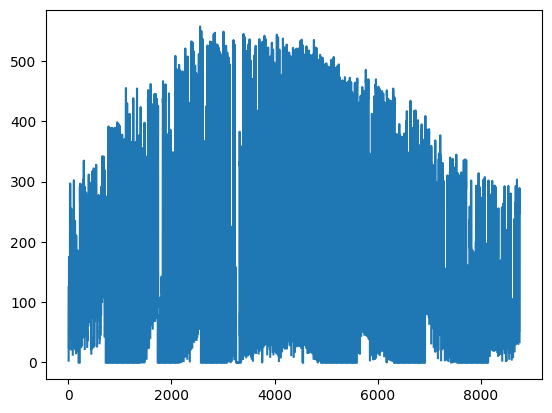

In [11]:
pdc0 = # [W] Nominal power at STC
gamma_pdc = -0.0035  # [%/degC] Pmax temperature coefficient

# Write your code here to calculate PV power
dc_power = 


dc_power.plot() # plot results

## Step 8: Reflect on the exercise

We managed to model the output of one panel, how do you think we can extend the model workflow to simulate a full system?

Last, this exercise made a number of simplifications. Can you name some? How do you think the accuracy was affected?

[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).